In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('C://Users/naikp/Downloads/Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
df.Customer_Segment.unique()  #1st quality segment

array([1, 2, 3], dtype=int64)

In [4]:
df.shape

(178, 14)

In [5]:
df.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

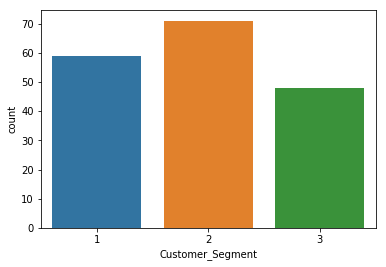

In [6]:
sns.countplot(df['Customer_Segment'])

PCA - Principal Component Analysis

reduces overfitting problem

In [7]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

In [8]:
X,y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2)

In [10]:
X_train, y_test

(array([[1.376e+01, 1.530e+00, 2.700e+00, ..., 1.250e+00, 3.000e+00,
         1.235e+03],
        [1.388e+01, 5.040e+00, 2.230e+00, ..., 5.800e-01, 1.330e+00,
         4.150e+02],
        [1.164e+01, 2.060e+00, 2.460e+00, ..., 1.000e+00, 2.750e+00,
         6.800e+02],
        ...,
        [1.267e+01, 9.800e-01, 2.240e+00, ..., 1.230e+00, 3.160e+00,
         4.500e+02],
        [1.208e+01, 2.080e+00, 1.700e+00, ..., 1.270e+00, 2.960e+00,
         7.100e+02],
        [1.229e+01, 2.830e+00, 2.220e+00, ..., 1.150e+00, 3.300e+00,
         2.900e+02]]),
 array([3, 1, 3, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 1, 3, 1, 1, 1, 2,
        1, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 3, 3, 1], dtype=int64))

In [11]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train, X_test

(array([[ 1.0049457 , -0.7504268 ,  1.1614433 , ...,  1.22930938,
          0.5237484 ,  1.64412168],
        [ 1.14947874,  2.36024955, -0.48151401, ..., -1.62998297,
         -1.91301236, -1.00075589],
        [-1.54847136, -0.28072353,  0.32248638, ...,  0.16240925,
          0.15896386, -0.14600887],
        ...,
        [-0.30789609, -1.23785471, -0.44655747, ...,  1.14395737,
          0.75721051, -0.88786478],
        [-1.01851687, -0.26299888, -2.33421056, ...,  1.31466139,
          0.46538287, -0.04924506],
        [-0.76558405,  0.40167555, -0.51647055, ...,  0.80254933,
          0.96148986, -1.40393845]]),
 array([[-1.39274209e-01, -5.91653861e-02,  1.12747146e-01,
          1.28729615e+00, -5.53398319e-02, -1.89599615e+00,
         -9.59312524e-01, -7.40450364e-01, -1.41893897e+00,
          3.42926689e-01, -1.28857493e+00, -1.86923821e+00,
         -5.33064126e-01],
        [ 1.07721222e+00, -5.55455629e-01,  1.82660223e-01,
         -1.67680395e+00,  8.40777095e-01,  2.

In [13]:
cov_mat = np.cov(X_train.T)
print(cov_mat)
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print(eig_values)
print(eig_vectors)

[[ 1.0070922   0.11178486  0.20228021 -0.32032447  0.26262164  0.25484731
   0.20215309 -0.12079743  0.14932238  0.54164335 -0.10433755  0.04502
   0.64155504]
 [ 0.11178486  1.0070922   0.12653448  0.23976957 -0.04145042 -0.34074697
  -0.40651837  0.32913346 -0.21869801  0.25594276 -0.55848077 -0.41575429
  -0.17568081]
 [ 0.20228021  0.12653448  1.0070922   0.44793327  0.29860042  0.15218128
   0.15504173  0.23952967  0.03915381  0.23955323 -0.03809267  0.07206874
   0.26058225]
 [-0.32032447  0.23976957  0.44793327  1.0070922  -0.06878867 -0.24983688
  -0.29914495  0.43310549 -0.14056773  0.00446791 -0.20569447 -0.23181727
  -0.39108138]
 [ 0.26262164 -0.04145042  0.29860042 -0.06878867  1.0070922   0.22249005
   0.21607667 -0.26184899  0.25410469  0.16880082  0.11076073  0.14282531
   0.44022621]
 [ 0.25484731 -0.34074697  0.15218128 -0.24983688  0.22249005  1.0070922
   0.86318678 -0.46914826  0.62220824 -0.09177685  0.40865953  0.69802331
   0.44223018]
 [ 0.20215309 -0.40651837 

In [14]:
'''from sklearn.decomposition import  PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance'''

'from sklearn.decomposition import  PCA\npca = PCA(n_components = None)\nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)\nexplained_variance = pca.explained_variance_ratio_\nexplained_variance'

In [15]:
'''a scree plot is a line plot of the eigenvalues of factors or principal components in an analysis. 
The scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA) 
or principal components to keep in a principal component analysis (PCA).'''
'''plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no. of components')
plt.ylabel('cumulative explained variance')'''

"plt.plot(np.cumsum(pca.explained_variance_ratio_))\nplt.xlabel('no. of components')\nplt.ylabel('cumulative explained variance')"

In [16]:
from sklearn.decomposition import  PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.35663253, 0.19294467])

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
logistic_pred = classifier.predict(X_test)
logistic_pred

array([3, 1, 3, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 1, 3, 1, 1, 1, 2,
       1, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 3, 3, 1], dtype=int64)

In [19]:
y_test

array([3, 1, 3, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 1, 3, 1, 1, 1, 2,
       1, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 3, 3, 1], dtype=int64)

In [20]:
from sklearn import metrics
logistic_accuracy = metrics.accuracy_score(y_test, logistic_pred)
logistic_accuracy

1.0

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, logistic_pred)

array([[15,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 12]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


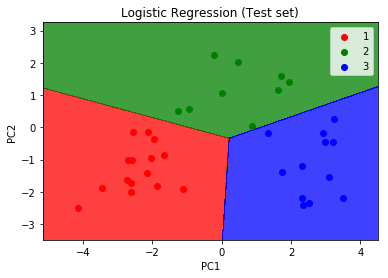

In [22]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

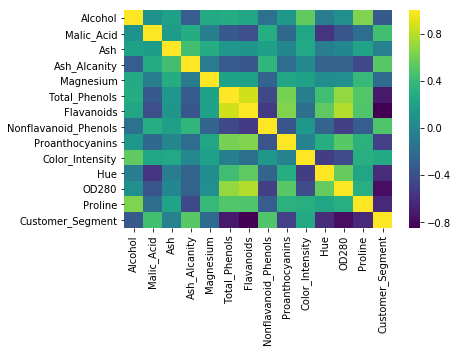

In [23]:
sns.heatmap(df.corr(), cmap='viridis', annot=False)